<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220314_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means 클러스터링
 - 군집화 비지도학습 

> 데이터에 '레이블'이 있다면 지도학습, 즉 미리 가지고 있는 데이터-레이블 기반으로 예측/분류를 수행할 수 있다.

> 그러나, 실제로는 레이블(분류)이 없는 경우가 많으며, 이러한 레이블이 없는 데이터 안에서 패턴과 구조를 발견하는 비지도 학습이 요구된다.

> 그 중 가장 되표적인 비지도 학습기술이 Clustering(군집화)

> 참고로 지도학습 Classification(분류)와는 엄연히 다르다. Clustering은 레이블을 모르더라도 그냥 비슷한 속성을 가진 데이터끼리 묶어주는 역할

### 군집화의 목표
 - 몇개의 그룹으로 묶을 것인가?
 - 데이터의 "유사도"는 어떻게 정의할 것인가?(유사한 데이터란 무엇인가?)

 이 두 질문을 해결할 수 있는 가장 유명한 전략 : K-Means 알고리즘

### K-Means 군집화의 원리
 - "K" : 데이터 세트에서 찾을 것으로 예상되는 클러스터(그룹) 수
 - "Means" : 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균거리(→ 이 값을 최소화 하는것이 알고리즘의 목표)

 K-Means에서는 이것을 구현하기 위해 반복적인(iterative) 접근이 필요하다

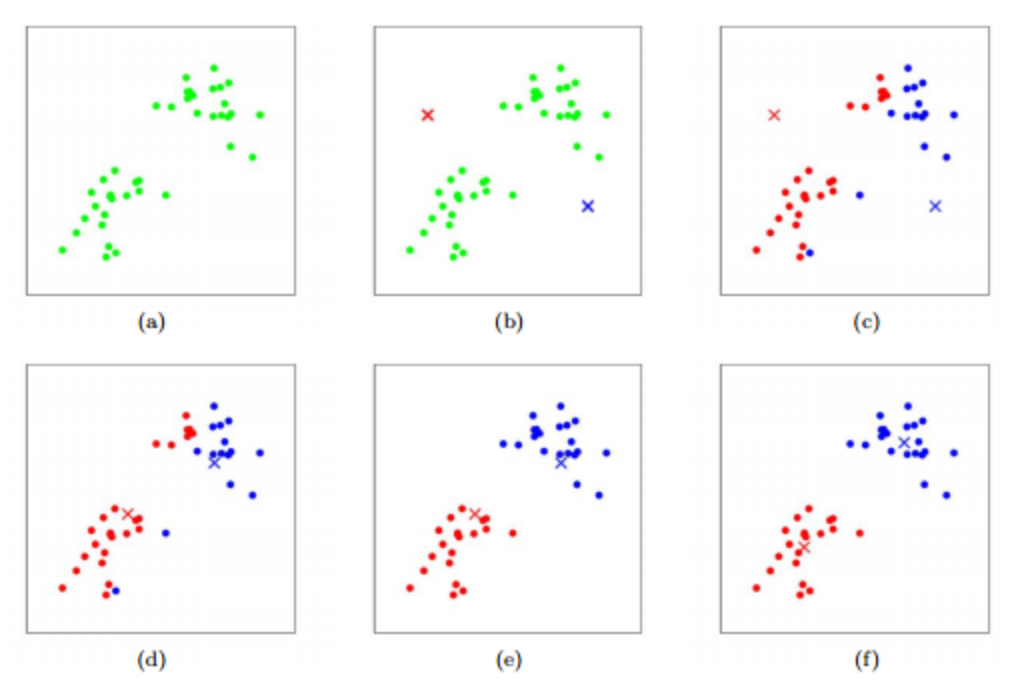

In [44]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/kmeans01.png') 

(b) : 중심점 2개를 아무데나 찍는다

(c) : 각 데이터들을 두개 점 중 가까운 곳으로 할당

(d) : (c)에서 만들어진 군집의 중심점을 업데이트

(e) : 중심점과 각 데이터 들의 거리를 구해서 군집을 재할당

### 실제 데이터(iris)를 가지고 Clustering

In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = iris['data']
data

In [48]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
df = pd.DataFrame(data, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


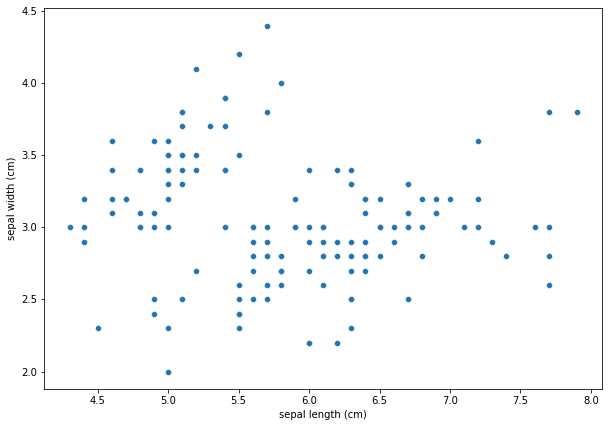

In [50]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(df.iloc[:,0], df.iloc[:, 1], palette='muted') # label 없이 plot해보자

In [51]:
X = df.iloc[:, :2].values # sepal의 length, width 두가지 특징으로 변수 할당

In [52]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [53]:
model.labels_ # 군집화된 결과 확인

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [54]:
df['cluster'] = model.labels_
df['cluster']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    0
Name: cluster, Length: 150, dtype: int32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


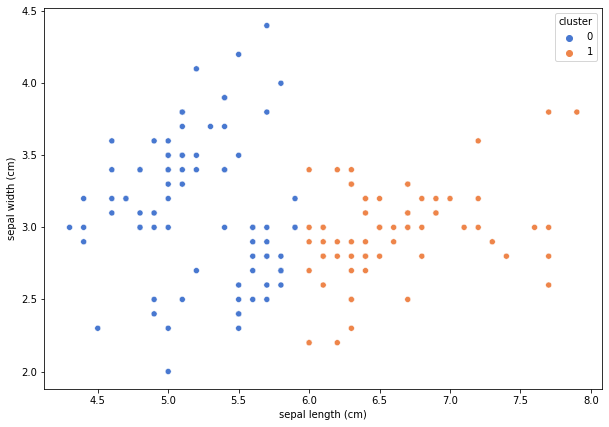

In [55]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df.iloc[:,0], df.iloc[:, 1], hue=df['cluster'], palette='muted') # k=2로 군집화된 결과를 label로 하여 plot해보자

#### 모델 평가

In [57]:
model.cluster_centers_ # 군집별로 데이터 평균값 

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

In [59]:
model.inertia_ # 각 클러스터의 센터와 각 데이터 간의 거리의 제곱의 합(작을수록 좋으며 최적의 k값을 찾는다)

58.204092789066735

#### 반복문을 이용한 최적의 k값 도출

Text(0, 0.5, 'inertia')

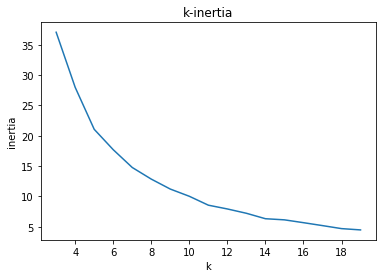

In [67]:
inertia = []
for i in range(3, 20):
  model = KMeans(n_clusters=i).fit(X)
  inertia.append(model.inertia_)
plt.plot(range(3,20), inertia)
plt.title('k-inertia')
plt.xlabel('k')
plt.ylabel('inertia')

k값이 너무 크게 되면 군집을 많이 나누게 되고, 모든 특성을 세세하게 고려하게 되므로 적절하지 않다